In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib


In [80]:
df = pd.read_csv(r"C:\Users\ADEEBSAYEED\Downloads\penguins_size.csv")

In [81]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [83]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Problem statement -
##### We aim to understand the physical differences among penguin species and
##### how factors such as beak size, flipper length, and body mass vary across islands and sexes.

### Data cleaning and manipulation

In [84]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [85]:
df['sex'] = df['sex'].fillna('Unknown')

In [86]:
df.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [87]:
df = df.dropna(subset=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])


In [88]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [89]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [90]:
categorical_features = ['species', 'island', 'sex']
numerical_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [91]:
discrete_features = [col for col in df.columns if df[col].dtype == 'object']
continuous_features = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]

In [92]:
print(" Discrete Features (Categorical):", discrete_features)
print("Continuous Features (Numeric):", continuous_features)

 Discrete Features (Categorical): ['species', 'island', 'sex']
Continuous Features (Numeric): ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']


#### Exploring Relationships

##### Relationship between species and numeric features

In [93]:
print("Average measurements by species:\n")
print(df.groupby('species')[continuous_features].mean(), "\n")


Average measurements by species:

           culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
species                                                                     
Adelie            38.791391        18.346358         189.953642  3700.662252
Chinstrap         48.833824        18.420588         195.823529  3733.088235
Gentoo            47.504878        14.982114         217.186992  5076.016260 



#### Relationship between sex and numeric features

In [94]:
print("Average measurements by sex:\n")
print(df.groupby('sex')[continuous_features].mean(), "\n")


Average measurements by sex:

         culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
sex                                                                       
.               44.500000        15.700000         217.000000  4875.000000
FEMALE          42.096970        16.425455         197.363636  3862.272727
MALE            45.854762        17.891071         204.505952  4545.684524
Unknown         40.900000        16.762500         196.750000  3896.875000 



##### Relationship between island and species

In [95]:
print("Species count by island:\n")
print(pd.crosstab(df['island'], df['species']), "\n")


Species count by island:

species    Adelie  Chinstrap  Gentoo
island                              
Biscoe         44          0     123
Dream          56         68       0
Torgersen      51          0       0 



##### Correlation analysis among continuous variables

In [96]:
corr_matrix = df[continuous_features].corr()
print("Correlation Matrix:\n", corr_matrix, "\n")


Correlation Matrix:
                    culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.235053           0.656181   
culmen_depth_mm           -0.235053         1.000000          -0.583851   
flipper_length_mm          0.656181        -0.583851           1.000000   
body_mass_g                0.595110        -0.471916           0.871202   

                   body_mass_g  
culmen_length_mm      0.595110  
culmen_depth_mm      -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000   



#### Visualizing the correlation matrix

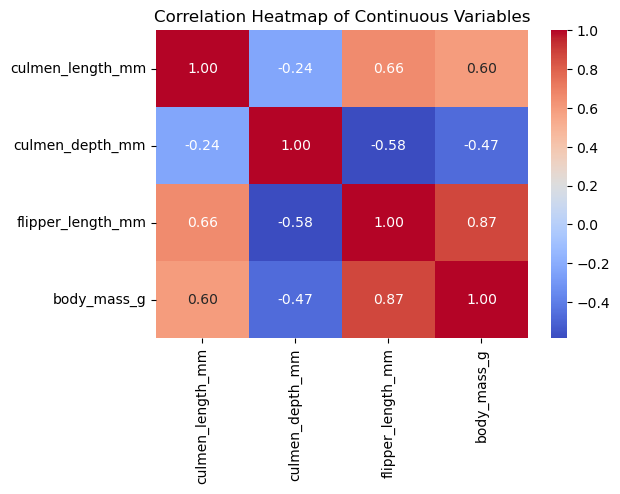

In [97]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()

##### Pairwise relationships

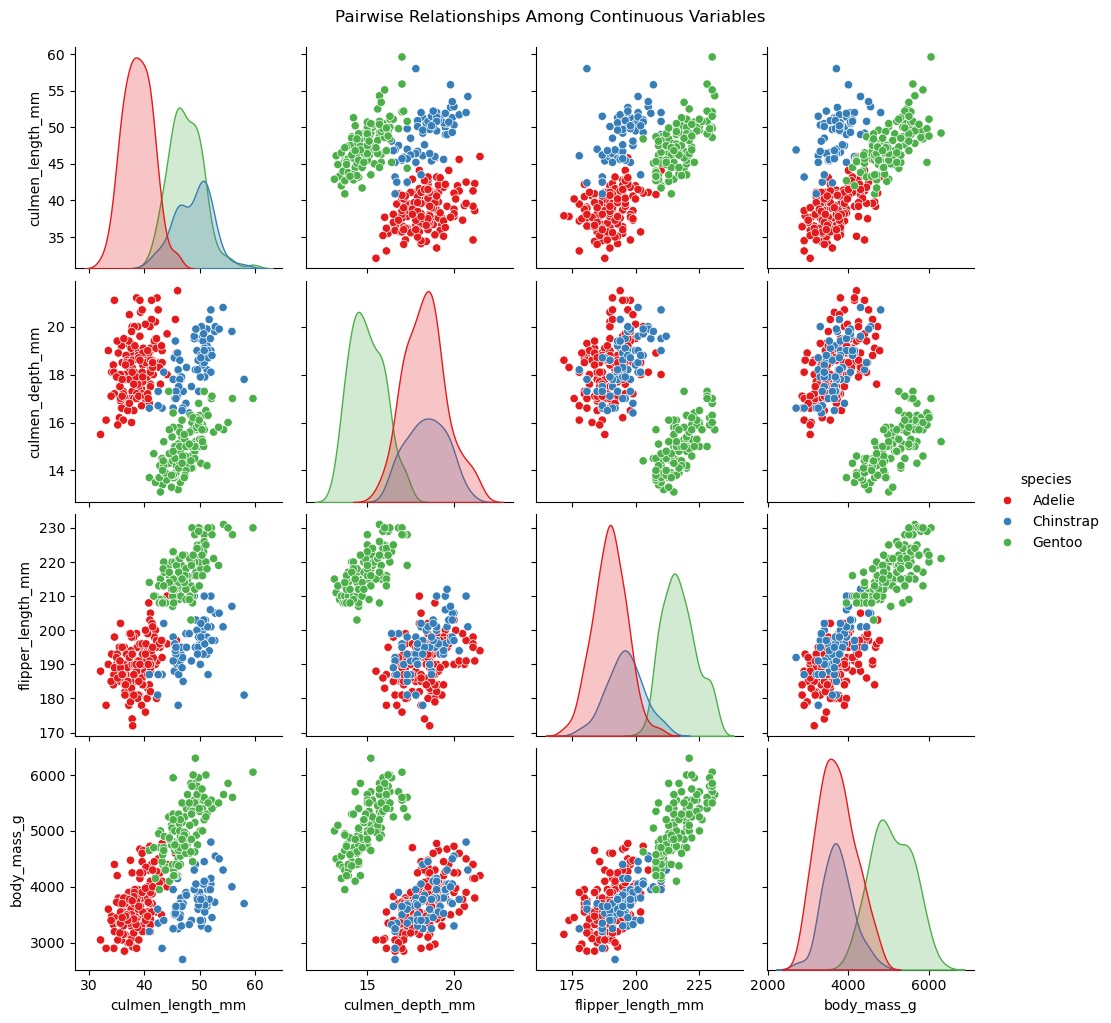

In [98]:
sns.pairplot(df, hue='species', vars=continuous_features, palette='Set1')
plt.suptitle("Pairwise Relationships Among Continuous Variables", y=1.02)
plt.show()

####  Analysis Questions: 
####  1. What are the distributions of the physical measurements?
####  2. How do penguin features vary by species?
####  3. Are there differences between male and female penguins?
####  4. Is there a relationship between flipper length and body mass?
####  5. How do islands differ in terms of penguin characteristics?


#### Visualizations :


####  Distribution of numerical features --- using histogram 

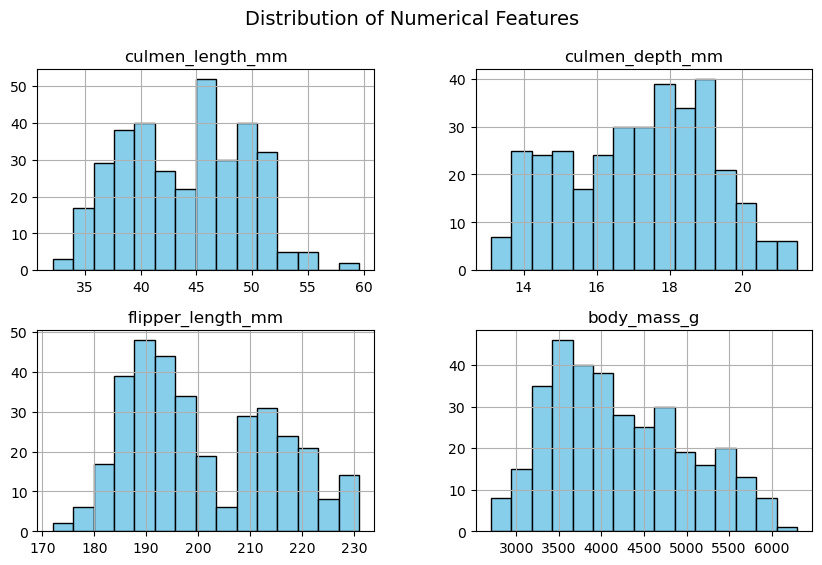

In [99]:
df[numerical_features].hist(bins=15, figsize=(10, 6), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

####  Categorical feature counts --- using countplot

C:\Users\ADEEBSAYEED\AppData\Local\Temp\ipykernel_29236\343370316.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


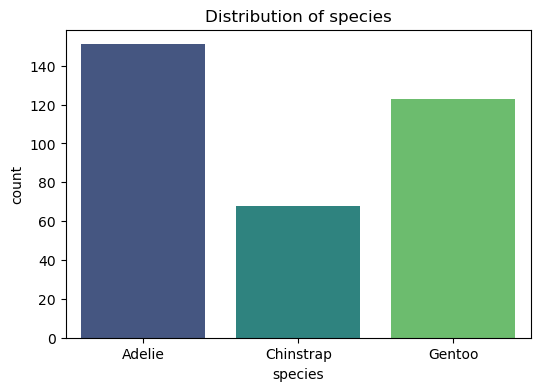

C:\Users\ADEEBSAYEED\AppData\Local\Temp\ipykernel_29236\343370316.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


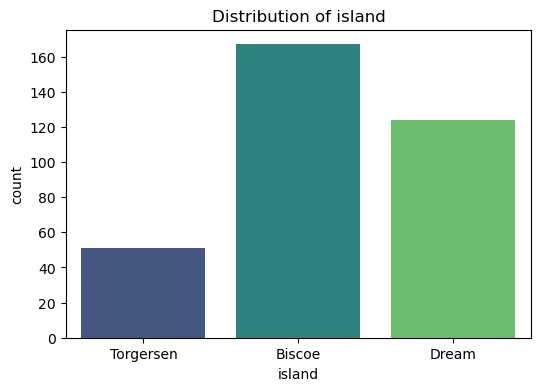

C:\Users\ADEEBSAYEED\AppData\Local\Temp\ipykernel_29236\343370316.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


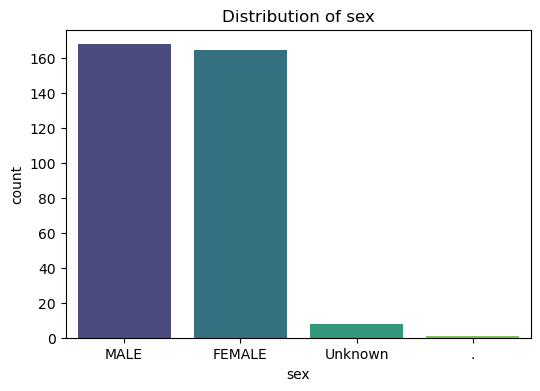

In [100]:
for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.show()

#### Boxplots: Comparing numerical features by species ---

C:\Users\ADEEBSAYEED\AppData\Local\Temp\ipykernel_29236\1895815195.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y=feature, palette="pastel")


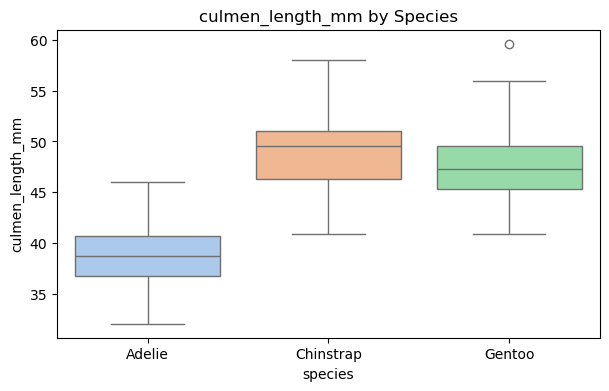

C:\Users\ADEEBSAYEED\AppData\Local\Temp\ipykernel_29236\1895815195.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y=feature, palette="pastel")


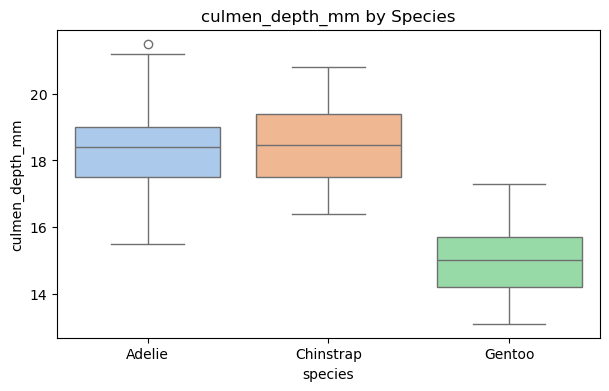

C:\Users\ADEEBSAYEED\AppData\Local\Temp\ipykernel_29236\1895815195.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y=feature, palette="pastel")


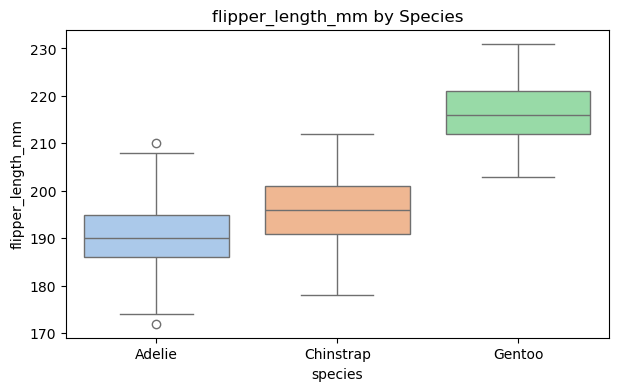

C:\Users\ADEEBSAYEED\AppData\Local\Temp\ipykernel_29236\1895815195.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y=feature, palette="pastel")


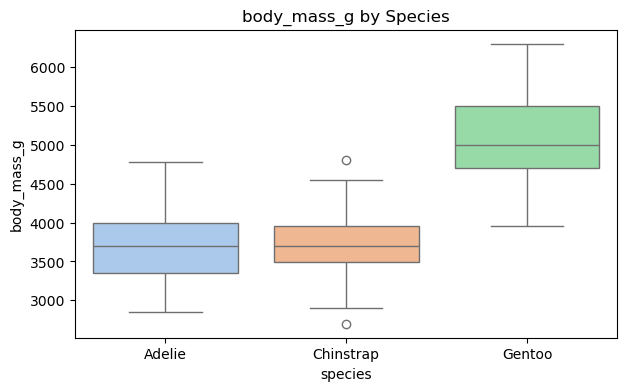

In [101]:
for feature in numerical_features:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df, x='species', y=feature, palette="pastel")
    plt.title(f"{feature} by Species")
    plt.show()

#### Relationship between flipper length and body mass --- using scatterplot

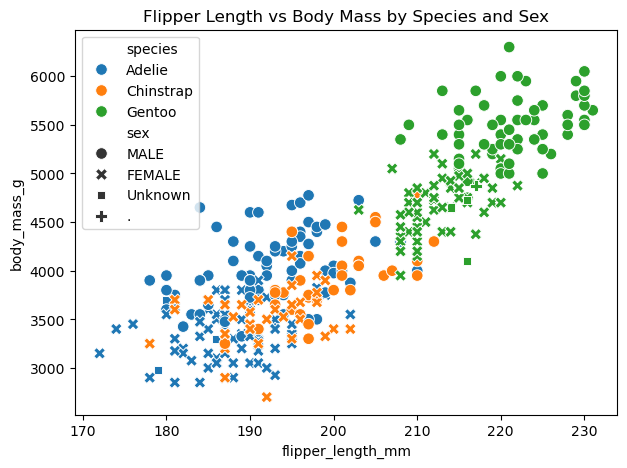

In [102]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='species', style='sex', s=70)
plt.title("Flipper Length vs Body Mass by Species and Sex")
plt.show()

#### Pairplot to visualize multivariate relationships

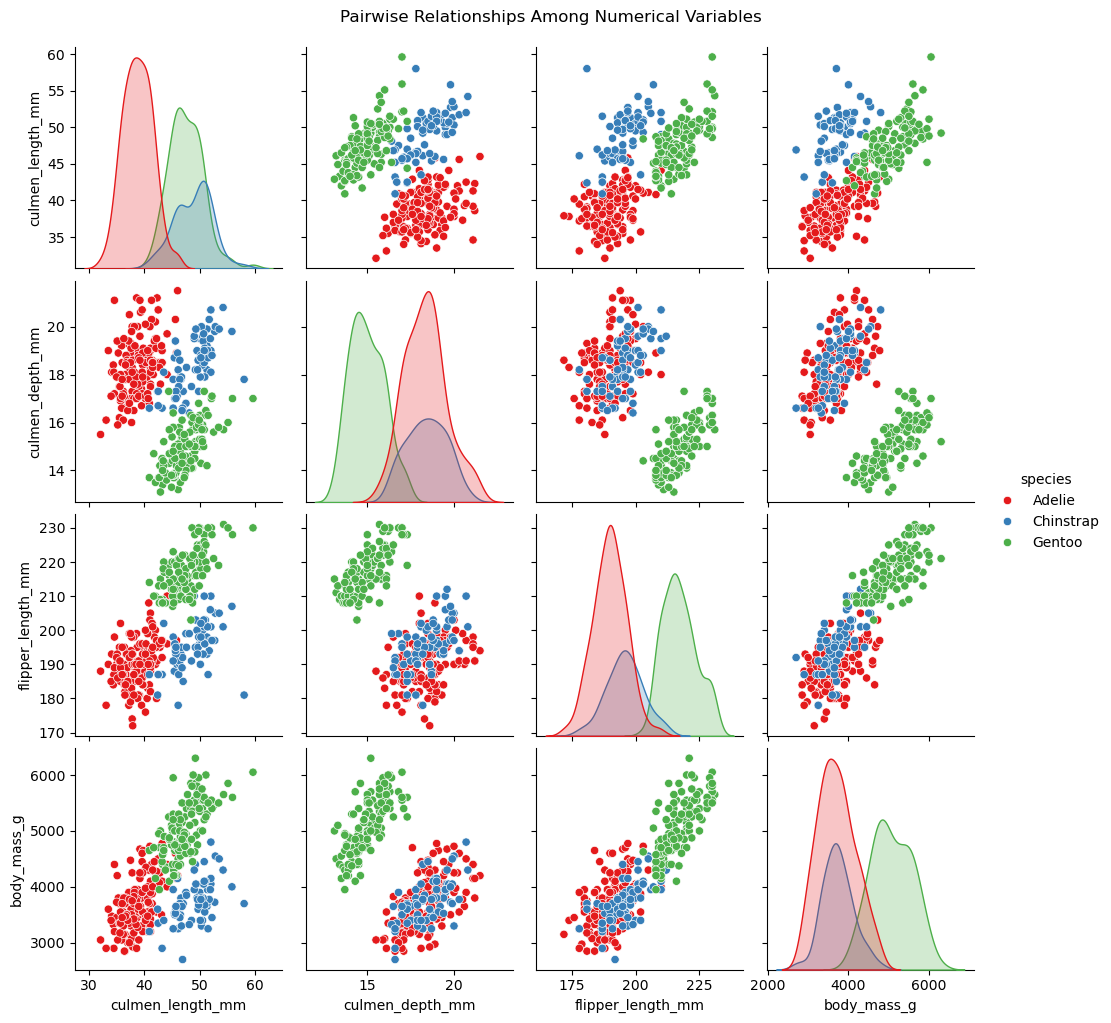

In [103]:
sns.pairplot(df, hue='species', vars=numerical_features, palette="Set1")
plt.suptitle("Pairwise Relationships Among Numerical Variables", y=1.02)
plt.show()

#### Correlation heatmap 

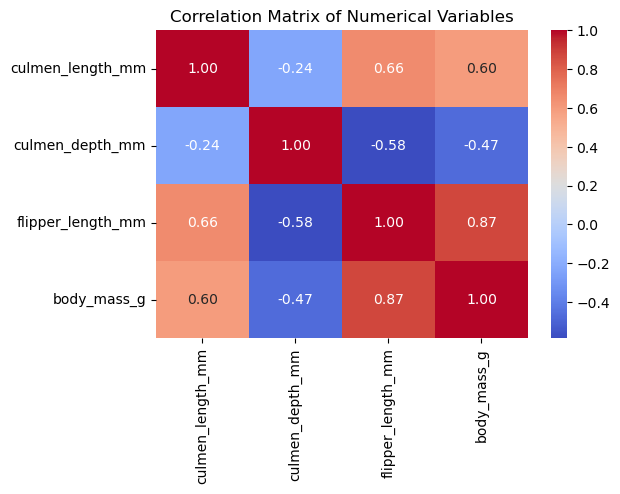

In [104]:
plt.figure(figsize=(6, 4))
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

## SPRINT- 1 PRE- PROCESSING

####  Feature engineering 

In [105]:
df['culmen_ratio'] = df['culmen_length_mm'] / df['culmen_depth_mm']
df['body_mass_kg'] = df['body_mass_g'] / 1000

####  Define features and target 

In [106]:
X = df.drop(columns=['species'])
y = df['species']

#### Train-test split 

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [108]:
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}\n")


Training samples: 273
Testing samples: 69



In [109]:
numeric_features = [
    'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
    'body_mass_g', 'culmen_ratio', 'body_mass_kg'
]

categorical_features = ['island', 'sex']

In [110]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [111]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

## SPRINT 2 - MODEL DEVELOPMENT

In [112]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', probability=True)
}



In [113]:
results = {}

print(" Cross-Validation Results (Training Data):\n")
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])
    cv_scores = cross_val_score(pipe, X_train, y_train, cv=5)
    results[name] = cv_scores.mean()
    print(f"{name}: Mean CV Accuracy = {cv_scores.mean():.3f}")

best_model_name = max(results, key=results.get)
print(f"\n Best Model Based on CV Accuracy: {best_model_name}")


 Cross-Validation Results (Training Data):

Logistic Regression: Mean CV Accuracy = 0.993
Random Forest: Mean CV Accuracy = 0.996
Support Vector Machine: Mean CV Accuracy = 0.993

 Best Model Based on CV Accuracy: Random Forest


## MODEL EVALUATION USING METRICS

In [114]:
best_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', models[best_model_name])])

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)


##### --- Metrics ---

In [115]:
test_acc = accuracy_score(y_test, y_pred)
print(f"\n Test Accuracy: {test_acc:.3f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))


 Test Accuracy: 1.000

Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



#### Creating confusion matrix using Heatmap

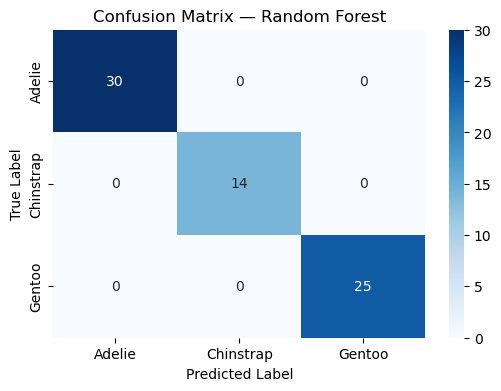

In [116]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.title(f"Confusion Matrix — {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### Feature Importance


C:\Users\ADEEBSAYEED\AppData\Local\Temp\ipykernel_29236\867884673.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=fi_df.head(10), palette="crest")


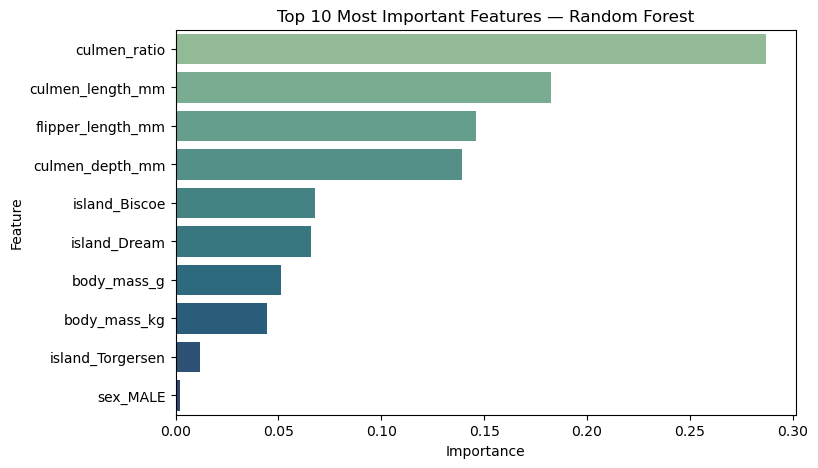

In [117]:
if best_model_name == "Random Forest":
    # Extract feature names
    num_feats = numeric_features
    cat_feats = list(best_model.named_steps['preprocessor']
                     .named_transformers_['cat']
                     .named_steps['onehot']
                     .get_feature_names_out(categorical_features))
    all_features = num_feats + cat_feats

    importances = best_model.named_steps['classifier'].feature_importances_
    fi_df = pd.DataFrame({'Feature': all_features, 'Importance': importances})
    fi_df = fi_df.sort_values('Importance', ascending=False)

    plt.figure(figsize=(8,5))
    sns.barplot(x='Importance', y='Feature', data=fi_df.head(10), palette="crest")
    plt.title("Top 10 Most Important Features — Random Forest")
    plt.show()





##  sprint -3 Model Deployment

In [118]:
base_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

#### Hyperparameter grid

In [119]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

## Performing gridsearchcv

In [122]:
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\n Best Parameters are: {grid_search.best_params_}")
print(f" Best Cross-Validation Accuracy: {grid_search.best_score_:.3f}\n")

Fitting 5 folds for each of 108 candidates, totalling 540 fits

 Best Parameters are: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
 Best Cross-Validation Accuracy: 1.000



## Model Evaluation

 Test Accuracy (Optimized Model): 1.000

Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



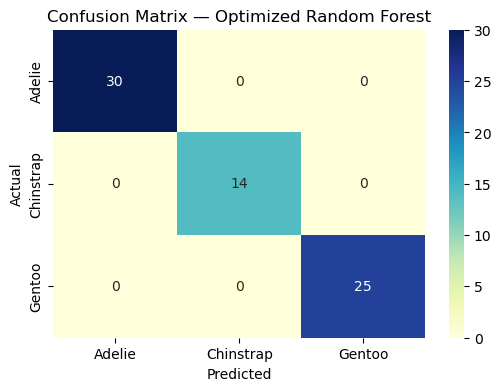

In [123]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Accuracy and classification report
test_acc = accuracy_score(y_test, y_pred)
print(f" Test Accuracy (Optimized Model): {test_acc:.3f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.title("Confusion Matrix — Optimized Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Feature Importance Visualization

C:\Users\ADEEBSAYEED\AppData\Local\Temp\ipykernel_29236\2013801540.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=fi_df.head(10), palette="crest")


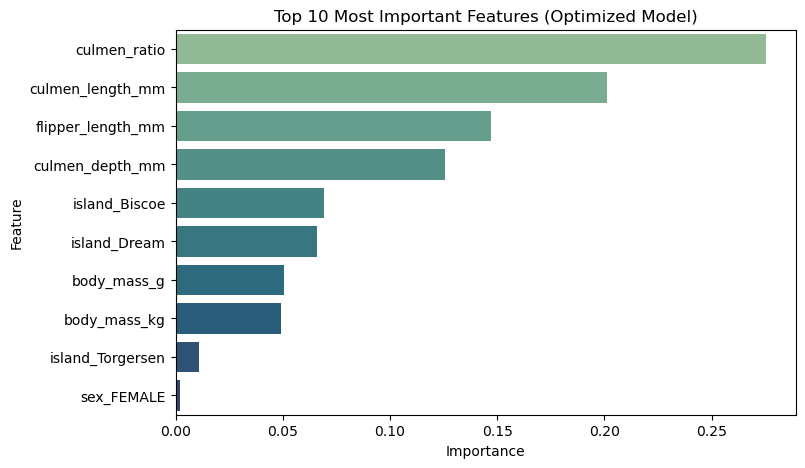

In [124]:
num_feats = numeric_features
cat_feats = list(best_model.named_steps['preprocessor']
                 .named_transformers_['cat']
                 .named_steps['onehot']
                 .get_feature_names_out(categorical_features))
all_features = num_feats + cat_feats

importances = best_model.named_steps['classifier'].feature_importances_
fi_df = pd.DataFrame({'Feature': all_features, 'Importance': importances})
fi_df = fi_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=fi_df.head(10), palette="crest")
plt.title("Top 10 Most Important Features (Optimized Model)")
plt.show()

## Saving Best Model

In [125]:
joblib.dump(best_model, "optimized_penguin_model.pkl")
print("\n Optimized model saved as 'optimized_penguin_model.pkl'")


 Optimized model saved as 'optimized_penguin_model.pkl'
